In [390]:
import pandas as pd
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
data = pd.read_csv("../data_sources/BankChurners.csv")

In [392]:
data.shape[0]

10127

In [393]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# EXAMEN LIMPIEZA DE DATOS
*def: Un gerente comercial de una cartera de tarjetas de crédito de consumo se enfrenta al problema de la deserción de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán* \
1. Tratar variables nulas

- En caso de que la columna tenga mas del 90% de valores nulos excluir 

In [394]:
data.isnull().sum() ## Para ver resumen de las columnas con el conteo de valores nulos.

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Realizamos la validación del porcentaje que representa la posible data null en cada columna de la data historica sin realizarle ningun tipo de transformación aún \
Con lo que tendriamos un array con las columnas que pasan la condición de tener menos del 90% de valores nulos

In [395]:
columns_valid = []
for column_ in data.columns:
    percentage = np.sum(pd.isna( data.loc[ : , column_ ] )) / data.shape[0]
    if percentage <= 0.9:
        columns_valid.append(column_)
    else:
        data = data.drop(columns=column_)

In [396]:
columns_valid ## Veremos la columnas validas (con menos del 90% de valores nulos)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [397]:
Categorical = data.loc[:,columns_valid].select_dtypes('object').columns.astype('object')

- caso de que sean variables categóricas reemplazar por el valor “others”

*def:* Ciclo para recorrer las columnas de variable categorica, buscar valores nulos y modifcarlos por *others*

In [398]:
for c_ in Categorical:
    data.loc[ pd.isnull(data[c_]), c_ ] = 'Others'

*Quitar columnas con un unico nivel (100% de representatividad), \
columnas con la totalidad de valores distintos (1% de representatividad) \
Columnas con más de un nivel y que al menos 1 nivel tengo más del 70% de representatividad* \
Con la finalidad de tener una data limpia que no se vea afectada por un variable donde predomine muy notablemente un nivel de la misma

In [399]:
columnsAnalisys = [] 
for c_ in data.columns:
    val = data.loc[ :, c_ ].drop_duplicates()
    if (val.shape[0] > 1) & (val.shape[0] < data.shape[0]):
        dfTmp = data.groupby(c_, as_index = False).agg({'CLIENTNUM': ['count']})
        dfTmp.columns = dfTmp.columns.droplevel(1)
        dfTmp['porcentage'] = dfTmp.apply(lambda r: ((r['CLIENTNUM'])/data.shape[0])*100, axis = 1)
        valR = dfTmp.loc[ dfTmp['porcentage'] >= 70, : ].shape[0]
        if valR == 0:
            columnsAnalisys.append(c_)

In [400]:
columnsAnalisys

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

*Realizamos la separación de los tipos de variables*

In [401]:
Categorical = data.loc[:,columnsAnalisys].select_dtypes('object').columns.astype('object')

In [402]:
data.loc[:,columnsAnalisys].select_dtypes('int64').columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [403]:
data.loc[:,columnsAnalisys].select_dtypes('float64').columns

Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [404]:
columnsAnalisys =  ['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### Nota: 
Se retiraron las columnas "*Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1* y *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2*" porque representan variables de respuestas o etiquetas

- Limpieza de valores númericas

In [405]:
data.loc[:, ['Gender']].value_counts() / data.shape[0]

Gender
F         0.529081
M         0.470919
dtype: float64

In [406]:
data.loc[:, ['Education_Level']].value_counts() / data.shape[0]

Education_Level
Graduate           0.308877
High School        0.198776
Unknown            0.149995
Uneducated         0.146835
College            0.100030
Post-Graduate      0.050953
Doctorate          0.044534
dtype: float64

*Para los niveles de Educación, decidimos trabajar con todos los niveles que encontramos en la data historica, ya que el nivel con menor % de representatividad de la data es 4.44% y consideramos que es un porcentaje que podría hacer mucha diferencia*

{'whiskers': [<matplotlib.lines.Line2D at 0x2228bf57460>,
 'caps': [<matplotlib.lines.Line2D at 0x2228bf570d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228bf57c10>],
 'medians': [<matplotlib.lines.Line2D at 0x2228bf29610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228bf29640>],
 'means': []}

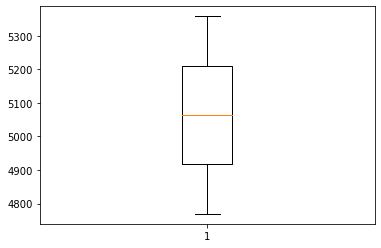

In [407]:
plt.boxplot(data.loc[ : ,['Gender']].value_counts())

Trabajamos ambos valores de "*Gender*" porque la columna está representada por dos niveles, en los cuales ninguno tiene dominio marcado uno sobre el otro en cuanto al % de representatividad (diferencia de casi el 7% Femenino sobre el Masculino).

##### LIMPIEZA DE VALORES NULOS EN VARIABLES NÚMERICAS
- En caso de que sea variable numérica, identifique alguna buena estratificación para remplazar los valores nulos por el valor de la mediana

Estrategia: generos, nivel de educación, categoria de ingresos y estado marital

In [408]:
for c_ in data.loc[ : ,columnsAnalisys].select_dtypes(['int64','float64']).columns:
    data.loc[ np.isnan(data[c_]), c_ ] = data.loc[: , ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Gender','Education_Level','Marital_Status','Income_Category'], as_index = False).median()

# ANALISIS PARA LA VARIABLE NUMERICA 

*Variable númericas continuas:* 
- *Credit_Limit* 
- *Avg_Utilization_Ratio*  
- *Avg_Open_To_Buy*

*Variables númericas continuas que no creímos necesario limpiar:*
- *Total_Trans_amt:* Esta información la consideramos incompleta, teniendo en cuenta el contexto de la variable, no podemos validar que en los últimos 12 meses el monto de las transacciones si sea lo que la columna refleja, y tampoco encontramos una forma de estratificar esta variable para limpiar valores atípicos, dado que no tiene una dependencia para que esto suceda o no, es decir, no podemos relacionar una categoria de ingresos, porque el monto total de las transacciones no se ve afectado por ello, es decir, que la categoria de ingresos pudiera ser un factor determinante pero, al ser una variable que contiene un acumulado de montos de 12 meses, podríamos estar ensuciando aún más esa columna con valores no aptos o reales acordes a la data historica detrás de esa columna y así dañar el futuro entrenamiento. 
- *Total_amt_chng_Q4_Q1:* Con el contexto anterior, en esta variable sucede casí de la misma manera a diferencia que esta es el resultado de tratar los valores de montos entre Q4 y Q1 (términos bancarios), lo que nos lleva a la misma conclusión anterior, dado que no conocemos la forma a la que se llegó a ese valor, no podemos realizar una estratificación sin estar 100% seguros que no estaremos ensuciando el dataSet.

Para estas últimas, el mayor inconveniente es la data historica que respalde las transacciones a las que se hace mención en el diccionario para estas variables.

*Variable discretas:* 
- *Months_on_book* 
- *Total_Relationship_Count* 
- *Months_Inactive_12_mon* 
- *Contacts_Count_12_mon* 
- *Total_Ct_chng_Q4_Q1* 
- *Total_Trans_Ct*
Variables descartadas para realizar el analisis y limpieza, porque se están utilizando como variables de frecuencia

## *CREDIT_LIMIT*

*Explicación/Analisis:* Luego de realizar un estricto analisis a la data historica, en el que logramos apreciar una tendencia marcada en cuanto al limite de crédito en el genero Femenino con respecto al Masculino. Realizamos varios analisis sin el sesgo de genero, observamos que el tratamiento de la variable númerica continua (Credit_Limit), no nos arrojaba resultados del todo satisfactorios, por lo cual decidimos tener en cuenta como primera estratificación la columna de genero (Ya que tiene más de 1 nivel, y ninguno de sus niveles representa más del 70% de la data), separando los registros por generos, nivel de educación, categoria de ingresos y estado marital; Llegando al punto de granularidad donde mejor resultados obtuvimos con la limpieza de valores atipicos a la variable continua.

### Caso #1
- *Gender:* F
- *Education_Level:* Uneducated
- *Marital_Status:* Married

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

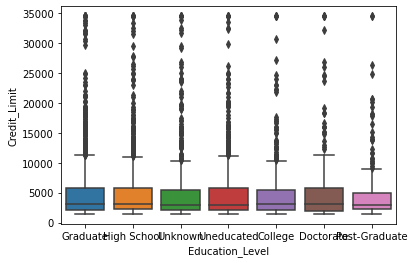

In [409]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'F'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

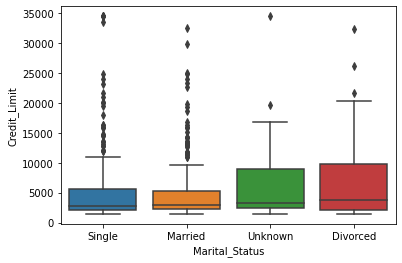

In [410]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'F') & (data['Education_Level'] == 'Uneducated'), : ], x= 'Marital_Status', y ='Credit_Limit' )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

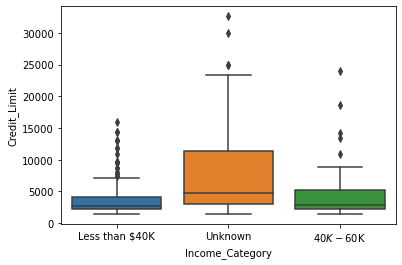

In [411]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'F') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married'), : ], x= 'Income_Category', y ='Credit_Limit' )

### Caso #2
- *Gender:* M
- *Education_Level:* Uneducated
- *Marital_Status:* Married

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

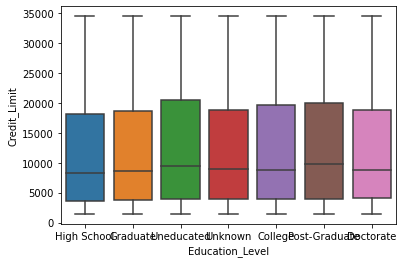

In [412]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'M'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

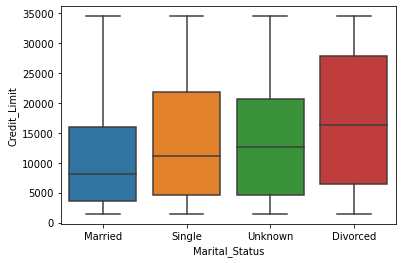

In [413]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'M') & (data['Education_Level'] == 'Uneducated'), : ], x= 'Marital_Status', y ='Credit_Limit' )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

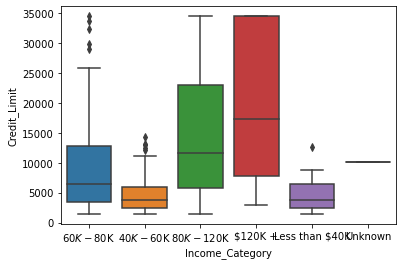

In [414]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'M') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married'), : ], x= 'Income_Category', y ='Credit_Limit' )

### ANALISIS DE CASO ESPECIFICO
*Def:* El caso seleccionado de los anteriormente vistos para la variable númerica "*Credit_Limit*", es el caso #1:
- *Gender:* F
- *Education_Level:* Uneducated
- *Marital_Status:* Married
- *Income_Category:* Less than 40K *Categoría seleccionada para hacer el zoom*

In [415]:
Unknow_Income = data.loc[ (data['Gender'] == 'F') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married') & (data['Income_Category'] == 'Less than $40K'), ['Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228b3fd760>,
 'caps': [<matplotlib.lines.Line2D at 0x2228b3fdd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228b3fd490>],
 'medians': [<matplotlib.lines.Line2D at 0x2228b3d02e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228b3d05b0>],
 'means': []}

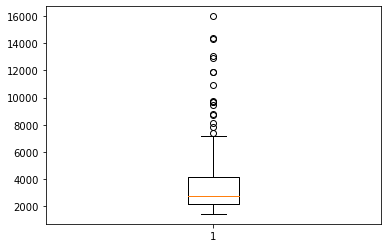

In [416]:
plt.boxplot(Unknow_Income)

In [417]:
q1 = np.quantile(Unknow_Income, .25)
q3 = np.quantile(Unknow_Income, .75)

In [418]:
iqr = q3 - q1

In [419]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [420]:
upper_bound

7170.5

In [421]:
lower_bound

-817.5

# AUTOMATIZAR
## CREDIT_LIMIT

In [422]:
Columns_drop = [] ##Definimos este arreglo para guardar las columnas que vayamos agregando a la data original y que al momento de finalizar el analisis, podemos quitarlas, dejando únicamente los resultado (data limpia)

In [423]:
dfq1 = data.loc[: , ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Gender','Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.25)
dfq1.columns = ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit_Q1']

In [424]:
dfq3 = data.loc[: , ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Gender','Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.75)
dfq3.columns = ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit_Q3']

In [425]:
dfmean = data.loc[: , ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Gender','Education_Level','Marital_Status','Income_Category'], as_index = False).mean()
dfmean.columns = ['Gender','Education_Level','Marital_Status','Income_Category','Credit_Limit_MEAN']

In [426]:
df_iqr = dfq1.merge(dfq3, on = ['Gender','Education_Level','Marital_Status','Income_Category'], how = 'inner').merge(dfmean, on = ['Gender','Education_Level','Marital_Status','Income_Category'], how = 'inner')

In [427]:
df_iqr.head(3)

,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN
0,F,College,Divorced,$40K - $60K,3076.0,6443.0,6114.176923
1,F,College,Divorced,Less than $40K,1843.5,3873.5,3028.244444
2,F,College,Divorced,Unknown,3264.0,11881.0,7388.144444


In [428]:
df_iqr['iqr'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q3'] - r['Credit_Limit_Q1']), axis = 1)

In [429]:
df_iqr.head(3)

,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN,iqr
0,F,College,Divorced,$40K - $60K,3076.0,6443.0,6114.176923,3367.0
1,F,College,Divorced,Less than $40K,1843.5,3873.5,3028.244444,2030.0
2,F,College,Divorced,Unknown,3264.0,11881.0,7388.144444,8617.0


In [430]:
df_iqr['upper_bound'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q3'] + (1.5*r['iqr'])), axis = 1)
df_iqr['lower_bound'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q1'] - (1.5*r['iqr'])), axis = 1)

In [431]:
Columns_drop = np.append(Columns_drop,['Credit_Limit_Q1','Credit_Limit_Q3','Credit_Limit_MEAN','iqr','upper_bound','lower_bound'],axis=None)

In [432]:
df_iqr.head(3)

,Gender,Education_Level,Marital_Status,Income_Category,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN,iqr,upper_bound,lower_bound
0,F,College,Divorced,$40K - $60K,3076.0,6443.0,6114.176923,3367.0,11493.5,-1974.5
1,F,College,Divorced,Less than $40K,1843.5,3873.5,3028.244444,2030.0,6918.5,-1201.5
2,F,College,Divorced,Unknown,3264.0,11881.0,7388.144444,8617.0,24806.5,-9661.5


In [433]:
df_f = data.merge(df_iqr, on = ['Gender','Education_Level','Marital_Status','Income_Category'], how='left').copy()

In [434]:
df_f.shape

(10127, 29)

In [435]:
def newCredit_Limit(r):
    if (r['Credit_Limit'] < r['lower_bound']) | (r['Credit_Limit'] > r['upper_bound']):
        return r['Credit_Limit_MEAN']
    else:
        return r['Credit_Limit']

In [436]:
df_f['new_Credit_Limit'] = df_f.apply( lambda r: newCredit_Limit(r), axis = 1 )
Columns_drop = np.append(Columns_drop,'Credit_Limit',axis=None)

# COMPARACIONES
## CREDIT_LIMIT

*def:* Comparamos el caso especifico al que decidimos realizarle "Zoom" para poder ver más a detalles la representación de la data en el boxplot. Donde *default* hace referencia al caso que decidimos analizar, mientras *cleaned* se refiere al resultado despues de la limpieza de valores atipicos de la data

- Credit_limit vs new_Credit_Limit

In [437]:
default = data.loc[ (data['Gender'] == 'M') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married') & (data['Income_Category'] == 'Less than $40K'), ['Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228d1caca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2228d1bc280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228d1ca9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2228d1bc700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228d1bc9d0>],
 'means': []}

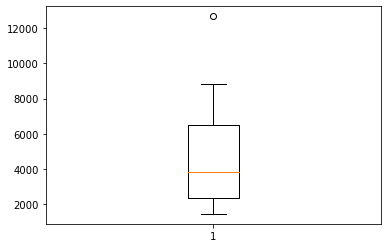

In [438]:
plt.boxplot(default)

In [439]:
cleaned = df_f.loc[ (df_f['Gender'] == 'M') & (df_f['Education_Level'] == 'Uneducated') & (df_f['Marital_Status'] == 'Married') & (df_f['Income_Category'] == 'Less than $40K'), ['new_Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228c1e6130>,
 'caps': [<matplotlib.lines.Line2D at 0x2228c1e66d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228c1d6e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2228c1e6c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228c1e6f40>],
 'means': []}

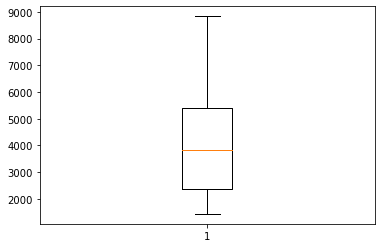

In [440]:
plt.boxplot(cleaned)

Apreciando el resultado reflejado en los dos boxplot anteriores, podemos deducir que nuestra limpieza con el metodo de estratificación realizado, fue efectivo, ya que logramos limpiar ese único valor atipico que se apreciaba antes de la limpieza

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

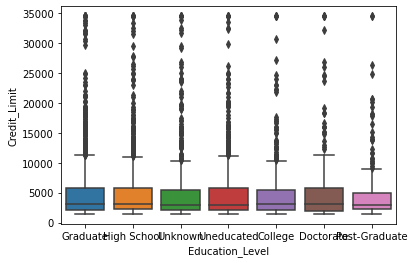

In [441]:
sns.boxplot(data = data.loc[ (data['Gender'] == 'F'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Education_Level', ylabel='new_Credit_Limit'>

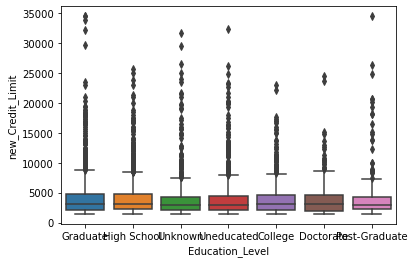

In [442]:
sns.boxplot(data = df_f.loc[ (df_f['Gender'] == 'F'), : ], x= 'Education_Level', y ='new_Credit_Limit' )

In [443]:
df_f.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN,iqr,upper_bound,lower_bound,new_Credit_Limit
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,...,0.061,0.000093,0.99991,3885.75,12531.75,8920.041333,8646.0,25500.75,-9083.25,12691.0000
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,...,0.105,0.000057,0.99994,2027.00,4403.00,3832.913400,2376.0,7967.00,-1537.00,3832.9134


#### HISTOGRAMAS
##### CREDIT_LIMIT
*def:* Observamos los histogramas del caso especifico al que decidimos realizarle "Zoom" para poder ver más a detalles la representación de la data en el histograma. Donde *default* hace referencia al caso que decidimos analizar, mientras *cleaned* se refiere al resultado despues de la limpieza de valores atipicos de la data

In [444]:
default.max()

Credit_Limit    12685.0
dtype: float64

In [445]:
default.min()

Credit_Limit    1438.3
dtype: float64

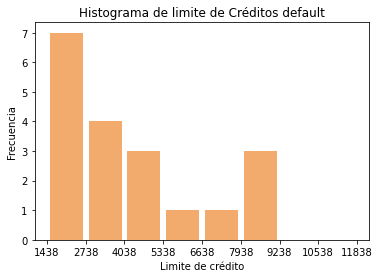

In [446]:
intervalos = np.arange(1438.0, 12685.0, 1300) #calculamos los extremos de los intervalos

plt.hist(x=default, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de limite de Créditos default')
plt.xlabel('Limite de crédito')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

In [447]:
cleaned.max()

new_Credit_Limit    8837.0
dtype: float64

In [448]:
cleaned.min()

new_Credit_Limit    1438.3
dtype: float64

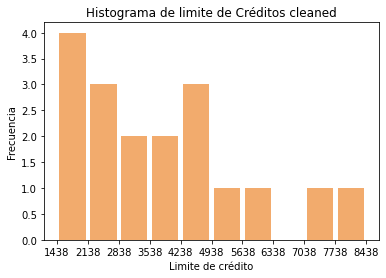

In [449]:
intervalos = np.arange(1438.0, 8837.0, 700) #calculamos los extremos de los intervalos

plt.hist(x=cleaned, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de limite de Créditos cleaned')
plt.xlabel('Limite de crédito')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

## *AVG_UTILIZATION_RATIO*

*Explicación/Analisis:* Al tratarse de una variable númerica, que está contenida entre 0-1, es decir, 0 - 100% es imporante analizarla y la estratificación que decidimos realizar es por la categoria de ingresos y el nivel de educación. Ya que al tratarse de una variable que nos indica el promedio de uso de la tarjeta, consideramos conveniente estratificar la data por esos dos criterios, ya que podríamos decir que una persona con ingresos menores a 40K, como podría ser un estudiante de high school, no tiene un uso promedio alto de la tarjeta, y basandonos en ese criterio, llegamos a la conclusión de que la estratificación propuesta resultaría ser la más adecuada, afirmación que se ve reflejada en los resultados luego de la limpieza

El factor más determinante en este metodo de estratificación es la categoria de ingresos, ya que es la variable que más peso tiene porque el dueño de la tarjeta tendría o podría ser consciente de que tanto puede usar la tarjeta para no sobregirarse.

### Caso #1
- *Income_Category:* $80K - $120K
- *Education_Level:* Graduate

In [450]:
df_f.loc[:, ['Income_Category']].value_counts() / df_f.shape[0]

Income_Category
Less than $40K     0.351634
$40K - $60K        0.176755
$80K - $120K       0.151575
$60K - $80K        0.138442
Unknown            0.109805
$120K +            0.071788
dtype: float64

Utilizaremos todos los niveles de categoria de ingresos, porque el 7% es una representatividad bastante significativa

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

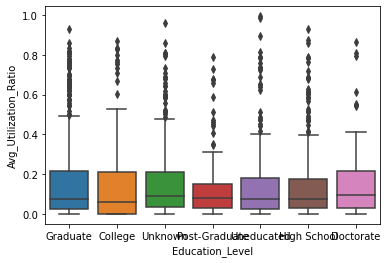

In [451]:
sns.boxplot(data = df_f.loc[ (df_f['Income_Category'] == '$80K - $120K'), : ], x= 'Education_Level', y ='Avg_Utilization_Ratio' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Avg_Utilization_Ratio'>

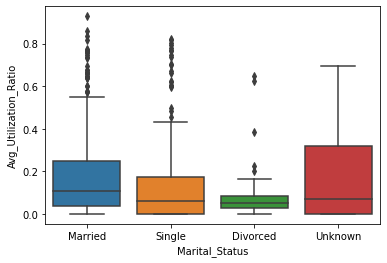

In [452]:
sns.boxplot(data = df_f.loc[ (data['Income_Category'] == '$80K - $120K') & (df_f['Education_Level'] == 'Graduate'), : ], x= 'Marital_Status', y ='Avg_Utilization_Ratio' )

### Caso #2
- *Income_Category:* $120K +
- *Education_Level:* Graduate

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

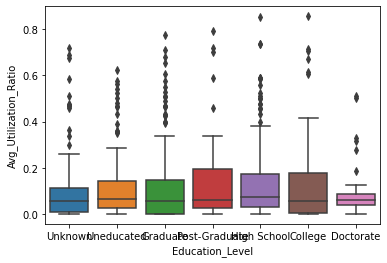

In [453]:
sns.boxplot(data = df_f.loc[ (df_f['Income_Category'] == '$120K +'), : ], x= 'Education_Level', y ='Avg_Utilization_Ratio' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Avg_Utilization_Ratio'>

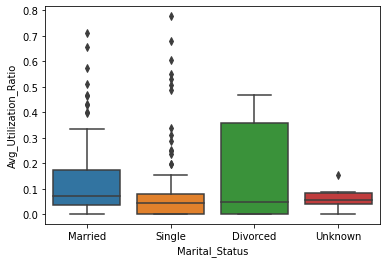

In [454]:
sns.boxplot(data = df_f.loc[ (data['Income_Category'] == '$120K +') & (df_f['Education_Level'] == 'Graduate'), : ], x= 'Marital_Status', y ='Avg_Utilization_Ratio' )

### ANALISIS DE CASO ESPECIFICO
*Def:* El caso seleccionado de los anteriormente vistos para la variable númerica "*avg_utilization_ratio*", es el caso #1:
- *Income_Category:* $80K - $120K
- *Education_Level:* Graduate
- *Marital-Status:* Married *Categoría seleccionada para hacer el zoom*

In [455]:
avg_marital = df_f.loc[ (df_f['Income_Category'] == '$80K - $120K') & (df_f['Education_Level'] == 'Graduate') & (df_f['Marital_Status'] == 'Married'), ['Avg_Utilization_Ratio']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228ccfab50>,
 'caps': [<matplotlib.lines.Line2D at 0x2228cd0a130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228ccfa880>],
 'medians': [<matplotlib.lines.Line2D at 0x2228cd0a6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228cd0a9a0>],
 'means': []}

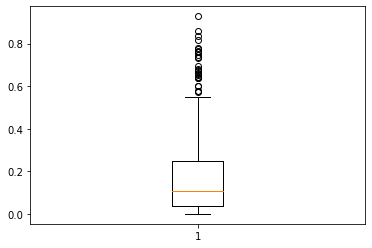

In [456]:
plt.boxplot(avg_marital)

In [457]:
q1 = np.quantile(avg_marital,.25)
q3 = np.quantile(avg_marital,.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [458]:
q1

0.039

In [459]:
q3

0.249

In [460]:
iqr

0.21

In [461]:
upper_bound

0.5640000000000001

In [462]:
lower_bound

-0.276

# AUTOMATIZAR
## AVG_UTILIZATION_RATIO

In [463]:
dfq1 = df_f.loc[: , ['Education_Level','Marital_Status','Income_Category','Avg_Utilization_Ratio']].groupby(['Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.25).copy()
dfq1.columns = ['Education_Level','Marital_Status','Income_Category','Avg_Utilization_Ratio_Q1']

dfq3 = df_f.loc[: , ['Education_Level','Marital_Status','Income_Category','Avg_Utilization_Ratio']].groupby(['Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.75).copy()
dfq3.columns = ['Education_Level','Marital_Status','Income_Category','Avg_Utilization_Ratio_Q3']

dfmean = df_f.loc[: ,['Education_Level','Marital_Status','Income_Category','Avg_Utilization_Ratio']].groupby(['Education_Level','Marital_Status','Income_Category'], as_index = False).mean().copy()
dfmean.columns = ['Education_Level','Marital_Status','Income_Category','Avg_Utilization_Ratio_MEAN']

df_iqr = dfq1.merge(dfq3, on = ['Education_Level','Marital_Status','Income_Category'], how = 'inner').merge(dfmean, on = ['Education_Level','Marital_Status','Income_Category'], how = 'inner').copy()

In [464]:
df_iqr['iqr_Avg'] = df_iqr.apply(lambda r: (r['Avg_Utilization_Ratio_Q3'] - r['Avg_Utilization_Ratio_Q1']), axis = 1)

In [465]:
df_iqr['upper_bound_Avg'] = df_iqr.apply(lambda r: (r['Avg_Utilization_Ratio_Q3'] + (1.5*r['iqr_Avg'])), axis = 1)
df_iqr['lower_bound_Avg'] = df_iqr.apply(lambda r: (r['Avg_Utilization_Ratio_Q1'] - (1.5*r['iqr_Avg'])), axis = 1)

In [466]:
df_f = df_f.merge(df_iqr, on = ['Education_Level','Marital_Status','Income_Category'], how='left').copy()

In [467]:
def newCredit_Limit(r):
    if (r['Avg_Utilization_Ratio'] < r['lower_bound_Avg']) | (r['Avg_Utilization_Ratio'] > r['upper_bound_Avg']):
        return r['Avg_Utilization_Ratio_MEAN']
    else:
        return r['Avg_Utilization_Ratio']

In [468]:
Columns_drop = np.append(Columns_drop,['Avg_Utilization_Ratio_Q1','Avg_Utilization_Ratio_Q3','Avg_Utilization_Ratio_MEAN','iqr_Avg','upper_bound_Avg','lower_bound_Avg'],axis=None)

In [469]:
df_f['new_Avg_Utilization_Ratio'] = df_f.apply( lambda r: newCredit_Limit(r), axis = 1 )
Columns_drop = np.append(Columns_drop,'Avg_Utilization_Ratio',axis=None)

# COMPARACIONES
## AVG_UTILIZATION_RATIO

*def:* Comparamos el caso especifico al que decidimos realizarle "Zoom" para poder ver más a detalles la representación de la data en el boxplot. Donde *default* hace referencia al caso que decidimos analizar, mientras *cleaned* se refiere al resultado despues de la limpieza de valores atipicos de la data

In [470]:
default = df_f.loc[ (data['Income_Category'] == '$80K - $120K') & (df_f['Education_Level'] == 'Graduate') & (df_f['Marital_Status'] == 'Married'), ['Avg_Utilization_Ratio']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228cd4e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2228cd4ee80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228cd4e5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2228fe88460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228fe88730>],
 'means': []}

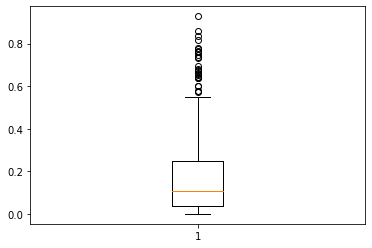

In [471]:
plt.boxplot(default)

In [472]:
cleaned = df_f.loc[ (df_f['Income_Category'] == '$80K - $120K') & (df_f['Education_Level'] == 'Graduate') & (df_f['Marital_Status'] == 'Married'), ['new_Avg_Utilization_Ratio']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228f1d5640>,
 'caps': [<matplotlib.lines.Line2D at 0x2228f1d5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228f1d5370>],
 'medians': [<matplotlib.lines.Line2D at 0x2228f1c91c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228f1c9490>],
 'means': []}

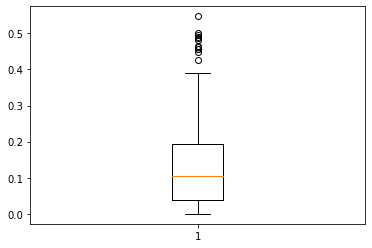

In [473]:
plt.boxplot(cleaned)

Como podemos observar luego de la limpieza de la data para la variable númerica *avg_utilization_ratio* se encuentran una serie de valores encima del limite del q4, sin embargo, estos valores no se consideran atipicos, porque están dentro del upper_bound

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

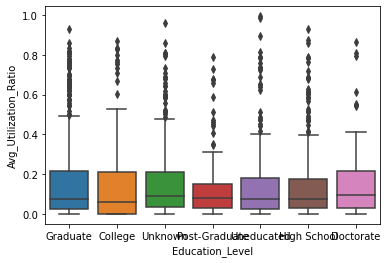

In [474]:
sns.boxplot(data = df_f.loc[ (df_f['Income_Category'] == '$80K - $120K'), : ], x= 'Education_Level', y ='Avg_Utilization_Ratio' )

<AxesSubplot:xlabel='Education_Level', ylabel='new_Avg_Utilization_Ratio'>

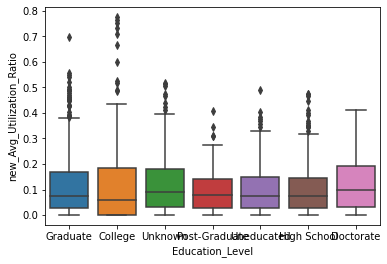

In [475]:
sns.boxplot(data = df_f.loc[ (df_f['Income_Category'] == '$80K - $120K'), : ], x= 'Education_Level', y ='new_Avg_Utilization_Ratio' )

#### HISTOGRAMAS
##### AVG_UTILIZATION_RATIO
*def:* Observamos los histogramas del caso especifico al que decidimos realizarle "Zoom" para poder ver más a detalles la representación de la data en el histograma. Donde *default* hace referencia al caso que decidimos analizar, mientras *cleaned* se refiere al resultado despues de la limpieza de valores atipicos de la data
Con la estrategia que utilzamos para estratificar, logramos ver que se limpió una buena cantidad de data, es decir, primero teniamos un max de cerca de 0.9 y luego de nuestra limpieza obtuvimos cerca 0.5, la limpieza a esta variable numerica la realizamos sin entrar al vicio analitico.

In [476]:
default.max()

Avg_Utilization_Ratio    0.928
dtype: float64

In [477]:
default.min()

Avg_Utilization_Ratio    0.0
dtype: float64

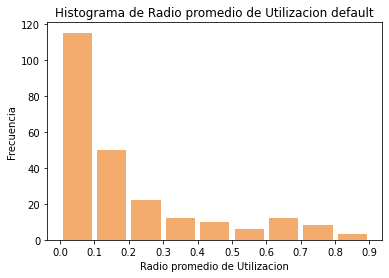

In [478]:
intervalos = np.arange(0.0, 0.928, 0.1) #calculamos los extremos de los intervalos

plt.hist(x=default, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Radio promedio de Utilizacion default')
plt.xlabel('Radio promedio de Utilizacion')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

In [479]:
cleaned.max()

new_Avg_Utilization_Ratio    0.547
dtype: float64

In [480]:
cleaned.min()

new_Avg_Utilization_Ratio    0.0
dtype: float64

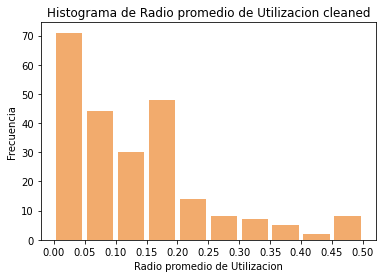

In [481]:
intervalos = np.arange(0.0, 0.547, 0.05) #calculamos los extremos de los intervalos

plt.hist(x=cleaned, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Radio promedio de Utilizacion cleaned')
plt.xlabel('Radio promedio de Utilizacion')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

## *AVG_OPEN_TO_BUY*

*Explicación/Analisis:* Se trata de una variable que representa el promedio de dinero disponible para realizar compras, al momento realizar el analisis de está variable númerica utilizamos un solo nivel de granularidad, que es la categoria de ingresos, porque consideramos que el promedio de dinero disponible para realizar compras está relacionado o puede ser comparable con otras personas con la misma categoria de ingresos.

Entiendo un poco la lógica del negocio, en este caso un banco, el promedio de linea abierta para compra debería depender de cuanto una persona puede pagar, es por ello que nos orientamos a estratificar directamente por la categoria de ingresos, para limpiar valores atipicos entre cada categoria de ingreso en el porcentaje de linea abierta para compra.

Para este caso, no utilizaremos tanto nivel de estratificación, ya que decidimos limpiar la data o la variable *AVG_OPEN_TO_BUY* únicamente dependiendo de la categoria de ingresos, sin quitar ningun nivel de está categoria porque la frecuencia más baja es de 7% que representa una buena cantidad de información.

Hacemos de una sola vez el analisis especifico de está variable, para luego pasar a la automatización

### Caso #1
- *Income_Category:* $80K - $120K

In [482]:
df_f.loc[:, ['Income_Category']].value_counts() / df_f.shape[0]

Income_Category
Less than $40K     0.351634
$40K - $60K        0.176755
$80K - $120K       0.151575
$60K - $80K        0.138442
Unknown            0.109805
$120K +            0.071788
dtype: float64

In [483]:
c1 = df_f.loc[ (df_f['Income_Category'] == 'Less than $40K'), ['Avg_Open_To_Buy']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228d05e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2228d0724c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228d05edf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2228d0729a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228d072850>],
 'means': []}

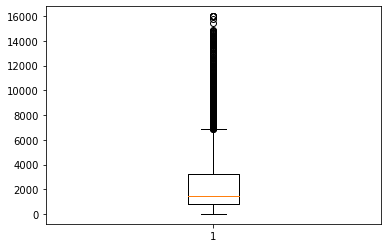

In [484]:
plt.boxplot(c1)

In [485]:
q1 = np.quantile(c1,.25)
q3 = np.quantile(c1,.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [486]:
q1

830.0

In [487]:
q3

3245.0

In [488]:
iqr

2415.0

In [489]:
upper_bound

6867.5

In [490]:
lower_bound

-2792.5

# AUTOMATIZAR
## TOTAL_TRANS_AMT

In [491]:
dfq1 = df_f.loc[: , ['Income_Category','Avg_Open_To_Buy']].groupby(['Income_Category'], as_index = False).quantile(0.25).copy()
dfq1.columns = ['Income_Category','Avg_Open_To_Buy_Q1']

dfq3 = df_f.loc[: , ['Income_Category','Avg_Open_To_Buy']].groupby(['Income_Category'], as_index = False).quantile(0.75).copy()
dfq3.columns = ['Income_Category','Avg_Open_To_Buy_Q3']

dfmean = df_f.loc[: , ['Income_Category','Avg_Open_To_Buy']].groupby(['Income_Category'], as_index = False).mean().copy()
dfmean.columns = ['Income_Category','Avg_Open_To_Buy_MEAN']

df_iqr = dfq1.merge(dfq3, on = ['Income_Category'], how = 'inner').merge(dfmean, on = ['Income_Category'], how = 'inner').copy()

In [492]:
df_iqr['iqr_Avg_Open'] = df_iqr.apply(lambda r: (r['Avg_Open_To_Buy_Q3'] - r['Avg_Open_To_Buy_Q1']), axis = 1)

In [493]:
df_iqr['upper_bound_Avg_Open'] = df_iqr.apply(lambda r: (r['Avg_Open_To_Buy_Q3'] + (1.5*r['iqr_Avg_Open'])), axis = 1)
df_iqr['lower_bound_Avg_Open'] = df_iqr.apply(lambda r: (r['Avg_Open_To_Buy_Q1'] - (1.5*r['iqr_Avg_Open'])), axis = 1)

In [494]:
df_f = df_f.merge(df_iqr, on = ['Income_Category'], how='left').copy()

In [495]:
def newCredit_Limit(r):
    if (r['Avg_Open_To_Buy'] < r['lower_bound_Avg_Open']) | (r['Avg_Open_To_Buy'] > r['upper_bound_Avg_Open']):
        return r['Avg_Open_To_Buy_MEAN']
    else:
        return r['Avg_Open_To_Buy']

In [496]:
Columns_drop = np.append(Columns_drop,['Avg_Open_To_Buy_Q1','Avg_Open_To_Buy_Q3','Avg_Open_To_Buy_MEAN','iqr_Avg_Open','upper_bound_Avg_Open','lower_bound_Avg_Open'],axis=None)

In [497]:
df_f['new_Avg_Open_To_Buy'] = df_f.apply( lambda r: newCredit_Limit(r), axis = 1 )
Columns_drop = np.append(Columns_drop,'Avg_Open_To_Buy',axis=None)

# COMPARACIONES
## AVG_OPEN_TO_BUY

*def:* Comparamos el caso especifico al que decidimos realizarle "Zoom" para poder ver más a detalles la representación de la data en el boxplot. Donde *default* hace referencia al caso que decidimos analizar, mientras *cleaned* se refiere al resultado despues de la limpieza de valores atipicos de la data

In [498]:
default = df_f.loc[ (df_f['Income_Category'] == 'Less than $40K'), ['Avg_Open_To_Buy']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228cfb8b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2228cfe4dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228cfb87c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2228cfe4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228cfe4370>],
 'means': []}

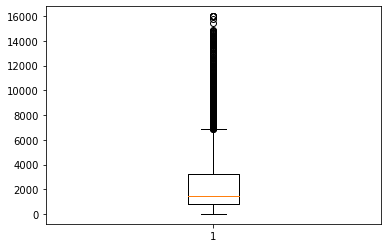

In [499]:
plt.boxplot(default)

A este punto de resultado obtenido, podríamos garantizar que a un nivel más granular entrariamos en sobreajuste, porque podemos observar que con el nivel de estratificación que le aplicamos obtuvimos una reducción enorme de valores atipicos, donde los valores sobre el límite de Q4, no son más que valores considerados dentro de "lo normal" porque siguen estando dentro y bastante por debajo del upper bound

In [500]:
cleaned = df_f.loc[ (df_f['Income_Category'] == 'Less than $40K'), ['new_Avg_Open_To_Buy']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2228c5537c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2228c553f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228c553490>],
 'medians': [<matplotlib.lines.Line2D at 0x2228c55b040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228c55b8b0>],
 'means': []}

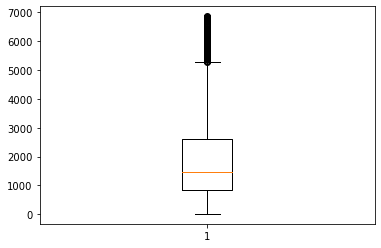

In [501]:
plt.boxplot(cleaned)

#### HISTOGRAMAS
##### TOTAL_TRANS_AMT
*def:* Observamos los histogramas del caso especifico al que decidimos realizarle "Zoom" para poder ver más a detalles la representación de la data en el histograma. Donde *default* hace referencia al caso que decidimos analizar, mientras *cleaned* se refiere al resultado despues de la limpieza de valores atipicos de la data
Con la estrategia que utilzamos para estratificar, logramos ver que se limpió una buena cantidad de data, es decir, primero teniamos un max de arriba de 16000 y luego de nuestra limpieza obtuvimos arriba de 6000, la limpieza a esta variable numerica la realizamos sin entrar al vicio analitico y con un grado de granularidad bastante grande ya habían categorias de ingresos para los cuales los valores atipicos era 0.

In [502]:
default.max()

Avg_Open_To_Buy    15987.0
dtype: float64

In [503]:
default.min()

Avg_Open_To_Buy    10.0
dtype: float64

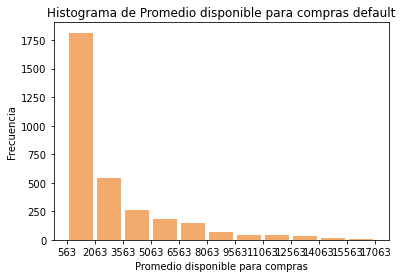

In [504]:
intervalos = np.arange(563.0, 17498.0, 1500.0) #calculamos los extremos de los intervalos

plt.hist(x=default, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Promedio disponible para compras default')
plt.xlabel('Promedio disponible para compras')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

In [505]:
cleaned.max()

new_Avg_Open_To_Buy    6867.0
dtype: float64

In [506]:
cleaned.min()

new_Avg_Open_To_Buy    10.0
dtype: float64

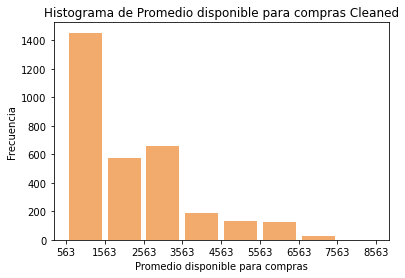

In [507]:
intervalos = np.arange(563.0, 9071.0, 1000.0) #calculamos los extremos de los intervalos

plt.hist(x=cleaned, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Promedio disponible para compras Cleaned')
plt.xlabel('Promedio disponible para compras')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma de Promedio disponible para compras

Con el histograma, podemos observar que los valores que se consideraron atipicos en el analisis, ahora se encuentrar concentrados en un el valor de la media, según la estratificación, cabe destacar que este gráfico es únicamente para la categoria de ingresos de *$80K - $120K*

### CONCLUSIONES DE LA LIMPIEZA DE VARIABLES NÚMERICAS CONTINUAS
Limpiamos un total de 4 variables númericas continuas donde para cada una buscamos un nivel muy adecuado de estratificación, en algunos casos evitando entrar al vicio analitico y llegando a un punto de granularidad adecuado para una estratificación no tan sobreajustada y tampoco muy floja, cabe destacar que para las categorias usadas para filtrar estas variables númericas, no se realizó la eliminación de data, ya que se podía apreciar una cantidad de data, generalmente mayor al 6 - 7%, que es una cantidad bastante significativa.

El enfoque del analisis pude verse complejo por la gran cantidad de variables numericas que contiene la data historica, sin embargo, gracias al analisis, logramos identificar esas variables númericas continuas que eran lo suficientemente decisivas y las que no representaban mucha influencia entre la data como para realizar una limpieza

Punto a destacar es que entre la data "valida" en las columnas, no encontramos niveles que tuvieran un nivel de representatividad extremadamente bajo porque generalmente estaban entre 6-7% de representatividad, por ello cosideramos conveniente trabajar con la totalidad de niveles de las variables.

Otro punto a destacar es que podemos observar que en algunas limpiezas, aparentemente siguen existiendo valores atipicos, pero luego de la limpieza ya no se consideran valores atipicos, porque en su mayoria sino en su totalidad se encuentran debajo del upper bound o por encima del lower bound

En cuanto a los histogramas que utilizamos para aclarar las comparaciones, podemos ver y analizar, que una vez realizada la limpieza de los valores atipicos, los extremos de la gráfica se ven reducidos y esos valores, pasan a ser concentrados en la media (precisamente porque fue el tratamiento que se les proporciono)

### ANALISIS AUTOMATIZADO DE VARIABLES CATEGORICAS

*def:* Para las variables categoricas decidimos realizar la transformación de los dos niveles con menor porcentaje de representatividad, donde el porcentaje de representatividad fuese menor al 10%, de igual forma, la nueva categorización para valores Unknown, también será otros. Tomamos la decisión de hacerlo así para no tener datos "sin saber" y categorizarlo de una buena vez en others al igual que los niveles que cumplan las condiciones antes mencionadas

Luego de realizar todo el proceso de transformación, podemos observar que el dataframe tiene todas las columnas con las que hemos venido trabajando, es por ello que en el primer caso de analisis creamos una variable para ir concatenando los nombres de las columnas que vamos generando para realizar los analisis necesarios y finalmente eliminar esas columnas para presentar una data totalmente limpia y tratada.

In [508]:
result = pd.DataFrame()
for c_ in Categorical:
    dfTmp = df_f.loc[: , c_].value_counts().rename_axis('level').reset_index(name='count')
    dfTmp['percentage'] = dfTmp['count']/df_f.shape[0]
    dfTmp['var'] = c_
    result = pd.concat([result, dfTmp])

In [509]:
result = result.sort_values(['var','percentage'], ascending = True)

In [510]:
result['rank'] = result.groupby('var', as_index = False).cumcount()

In [511]:
def newCategoricalValue(r):
    if ((r['rank'] <= 1 ) & (r['percentage'] < 0.1)) | (r['level'] == 'Unknown'):
        return 'Others'
    else:
        return r['level']

In [512]:
result['new_level'] = result.apply(lambda r: newCategoricalValue(r), axis = 1)

In [513]:
result = result.loc[ :, ['level','var','new_level']]

In [514]:
result

,level,var,new_level
6,Doctorate,Education_Level,Others
5,Post-Graduate,Education_Level,Others
4,College,Education_Level,College
3,Uneducated,Education_Level,Uneducated
2,Unknown,Education_Level,Others
1,High School,Education_Level,High School
0,Graduate,Education_Level,Graduate
1,M,Gender,M
0,F,Gender,F
5,$120K +,Income_Category,Others


*def:* Guardamos un archivo por cada variable categorica, que contiene las reglas aplicadas para la transformación, así como también realizar el merge (left) con el dataframe que resultó de la limpieza de variables númericas continuas. \
Se eliminaron las columnas duplicadas donde se realizó la limpieza y transformación tanto de variables numéricas continuas como de variables categoricas y se dejó únicamente el nuevo valor obtenido de la limpieza y transformación, guardando este dataframe con el nombre *data_cleaned.csv* en la carpeta *data_sources*. 

In [515]:
for var in result.loc[:,'var'].drop_duplicates():
    dataTmp = result.loc[ result['var'] == var, ['level','new_level']]
    nombre_archivo = var + '_rules.csv'
    dataTmp.to_csv('../rules_categorical/' + nombre_archivo, index = False)
    dataTmp = dataTmp.rename(columns={"level": var, "new_level": 'new_level_'+var})
    df_f = df_f.merge(dataTmp, on = var, how = 'left')
    df_f = df_f.drop(columns=[var])

In [516]:
df_f.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Credit_Limit_Q1', 'Credit_Limit_Q3', 'Credit_Limit_MEAN', 'iqr',
       'upper_bound', 'lower_bound', 'new_Credit_Limit',
       'Avg_Utilization_Ratio_Q1', 'Avg_Utilization_Ratio_Q3',
       'Avg_Utilization_Ratio_MEAN', 'iqr_Avg', 'upper_bound_Avg',
       'lower_bound_Avg', 'new_Avg_Utilization_Ratio', 'Avg_Open_To_B

In [517]:
df_f = df_f.drop(columns = Columns_drop)

In [518]:
df_f.to_csv('../data_sources/data_cleaned.csv', index = False)